 Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [18]:
import pandas as pd

column_names = ["edibility", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing",
                    "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
                    "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
                    "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
df = pd.read_csv("./agaricus-lepiota.data", names=column_names)
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
import numpy as np

In [56]:
df_dummy = pd.get_dummies(df)
skb = SelectKBest(chi2, k=10)

X = df_dummy.values
y = df_dummy[["edibility_e", "edibility_p"]]

print(X.shape)
print(y.shape)

skb.fit(X,y)
X_new = skb.transform(X)
print(X_new.shape)

skb_features = [df_dummy.columns[i] for i in skb.get_support(indices=True)]
print("Selected features:", skb_features)

(8124, 119)
(8124, 2)
(8124, 10)
Selected features: ['edibility_e', 'edibility_p', 'odor_f', 'odor_n', 'gill-size_n', 'gill-color_b', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'ring-type_l', 'spore-print-color_h']


In [57]:
from sklearn import decomposition

X = df_dummy = pd.get_dummies(df)
print("Original space:", X.shape)
n = 3

pca = decomposition.PCA(n_components=n)
pca.fit(X)
X_pca = pca.transform(X)
print("PCA space:", X_pca.shape)

best_features = [pca.components_[i].argmax() for i in range(X_pca.shape[1])]
feature_names = [X.columns[best_features[i]] for i in range(X_pca.shape[1])]

print(f"{n} best features:", feature_names)

Original space: (8124, 119)
PCA space: (8124, 3)
3 best features: ['edibility_p', 'stalk-root_b', 'habitat_g']


In [58]:
set(skb_features).intersection(set(feature_names))

{'edibility_p'}

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
column_names = ["edibility", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing",
                    "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
                    "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
                    "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
df = pd.read_csv("./agaricus-lepiota.data", names=column_names)
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [17]:
# remove edibility from dataset
df.pop("edibility")
# generate dummies: each category gets a proper type (bool, int etc)
dummies = pd.get_dummies(df)

In [19]:
dummies.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,7672,8120,4972,7296,8092,4468,5804,8120,5568,4880,...,6876,4084,6412,4976,5976,7292,7832,6980,7756,7932


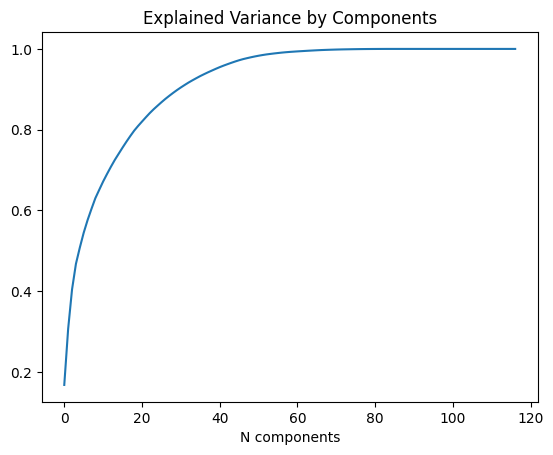

In [20]:
pca = PCA()  # Principal Component Analysis
pca.fit(dummies)
amount = len(pca.explained_variance_)

plt.figure()
plt.plot(range(0, amount), pca.explained_variance_ratio_.cumsum())  # lol
plt.title('Explained Variance by Components')
plt.xlabel("N components")
pca = PCA(n_components=20)
df_pca = pca.fit_transform(dummies)plt.show()

/home/nic/School/maskinlæring/labs/1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


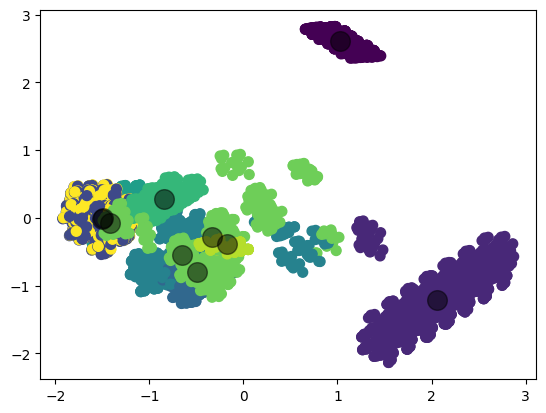

In [24]:
pca = PCA(n_components=20)
X = pca.fit_transform(dummies)

kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

/home/nic/School/maskinlæring/labs/1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


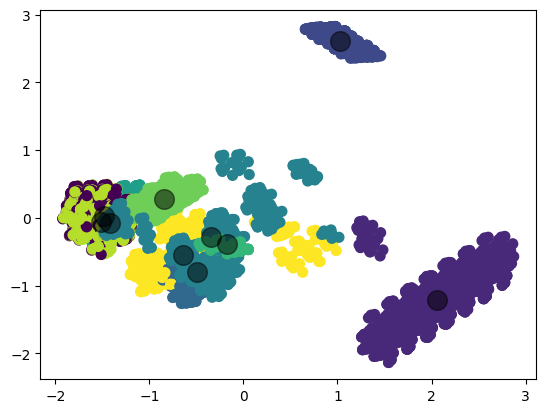

In [22]:
pca = PCA(n_components=30)
X = pca.fit_transform(dummies)

kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

/home/nic/School/maskinlæring/labs/1/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


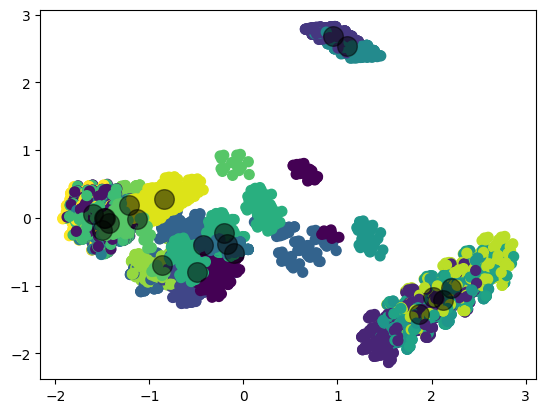

In [23]:
pca = PCA(n_components=30)
X = pca.fit_transform(dummies)

kmeans = KMeans(n_clusters=20)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

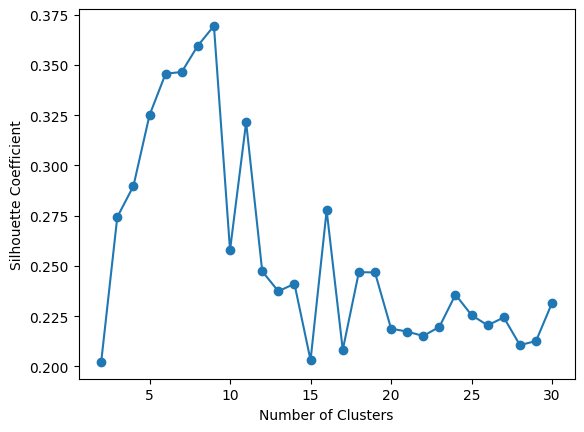

In [27]:
pca = PCA(n_components=20)
X = pca.fit_transform(dummies)
silhouettes = []

for i in range(2, 31):
    kmeans_pca = KMeans(n_clusters=i, n_init=10)
    kmeans_pca.fit(X)
    silhouettes.append(metrics.silhouette_score(X, kmeans_pca.labels_))
    
plt.figure()
plt.plot(range(2, 31), silhouettes, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [31]:
best_silhouette = max(silhouettes)
idx = silhouettes.index(best_silhouette)

print(f"Best silhoette coefficient = {best_silhouette} with number of clusters / k = {idx}")

Best silhoette coefficient = 0.36933302296752435 with number of clusters / k = 7


In [34]:
def visualize_cluster(k, X):
    labels = KMeans(n_clusters=k, n_init=10).fit_predict(X)
    pca = PCA(n_components=3)
    x_plot = np.array(pca.fit_transform(dummies))
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(f"K = {k} ")
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(x_plot[:,0], x_plot[:,1], x_plot[:,2], c=labels, s=50)

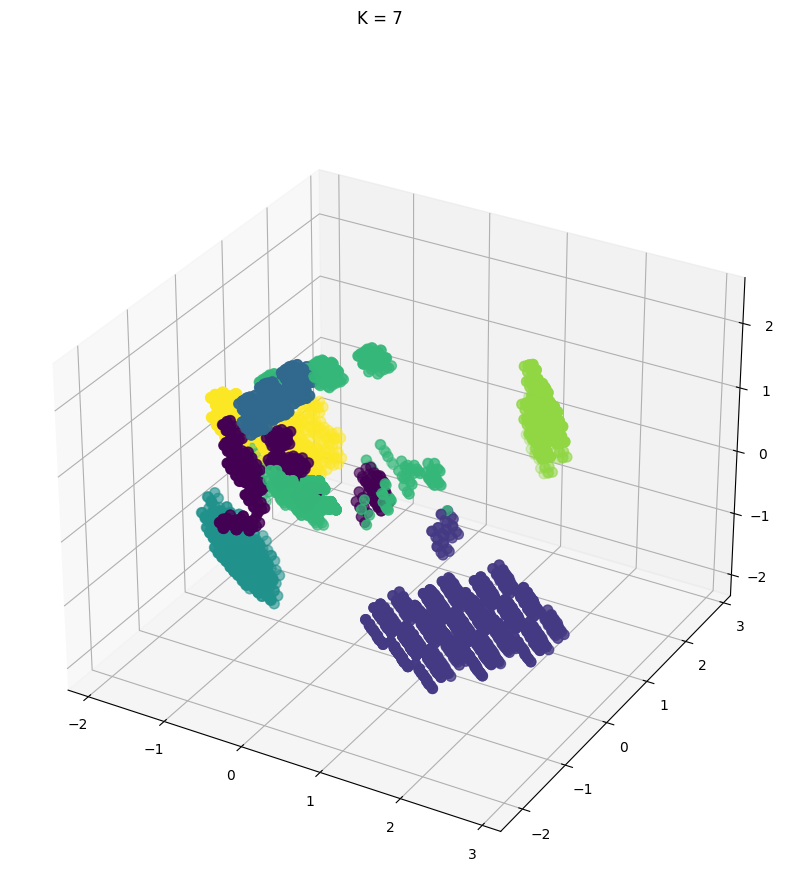

In [35]:
visualize_cluster(7, X)

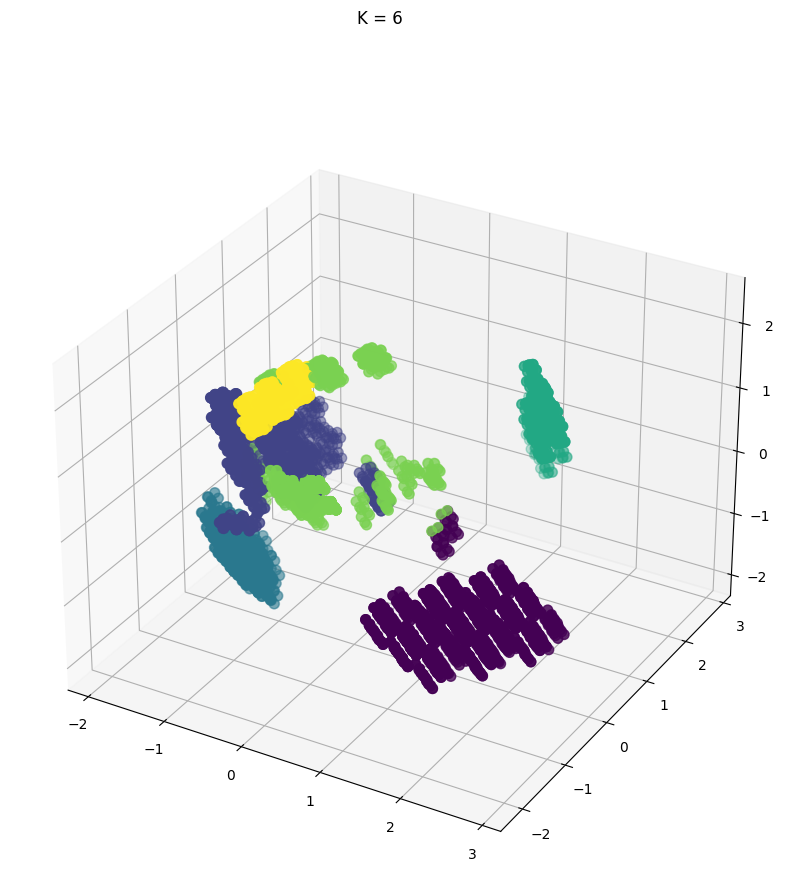

In [36]:
visualize_cluster(6, X)

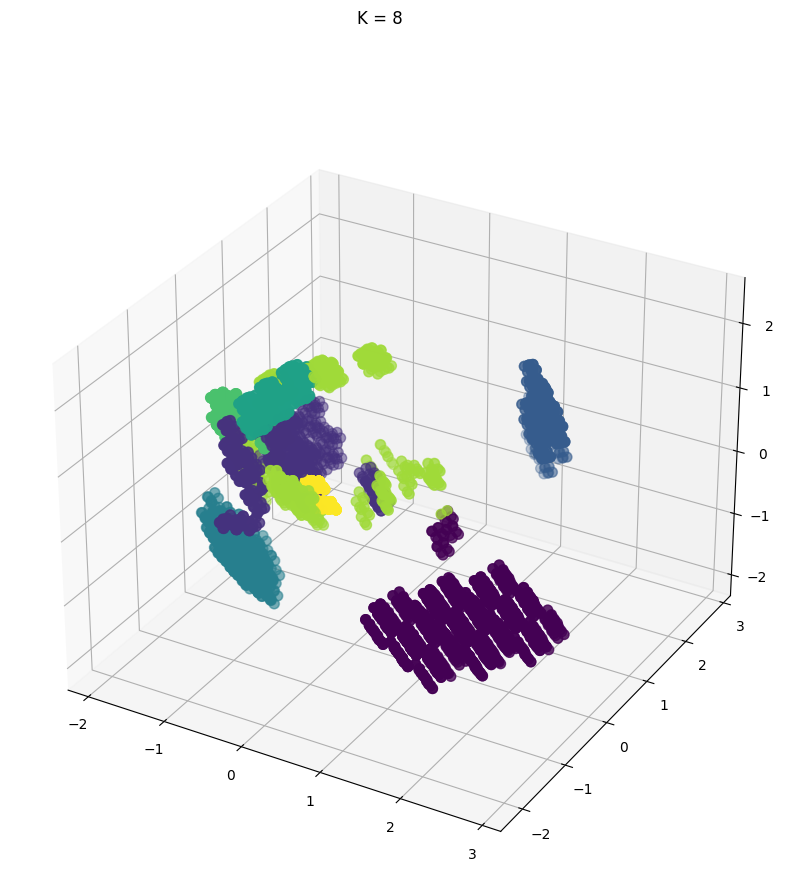

In [38]:
visualize_cluster(8, X)